<a href="https://colab.research.google.com/github/Ash2809/CodSoft/blob/main/Movie_Genre_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import pandas as pd
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import confusion_matrix,classification_report,f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
nltk.download('stopwords')

In [ ]:
train_data = pd.read_csv("/content/drive/MyDrive/CodSoft/Movie Genre_Classification/Genre Classification Dataset/train_data.txt",
                         sep = ":::",
                         names = ["Title", "Genre", "Description"])

train_data.head(4)

<ipython-input-4-23317e7e46c6>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  train_data = pd.read_csv("/content/drive/MyDrive/CodSoft/Movie Genre_Classification/Genre Classification Dataset/train_data.txt",


,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...


In [ ]:
test_data = pd.read_csv("/content/drive/MyDrive/CodSoft/Movie Genre_Classification/Genre Classification Dataset/test_data_solution.txt",
                        sep = ":::",
                        names = ["Title", "Genre", "Description"])

test_data.head()

<ipython-input-5-4e99bf1fb26c>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_data = pd.read_csv("/content/drive/MyDrive/CodSoft/Movie Genre_Classification/Genre Classification Dataset/test_data_solution.txt",


,Title,Genre,Description
1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


In [ ]:
train_data.shape

(54214, 3)

<Axes: title={'center': 'Number of Genres in train data'}, xlabel='Genre', ylabel='count'>

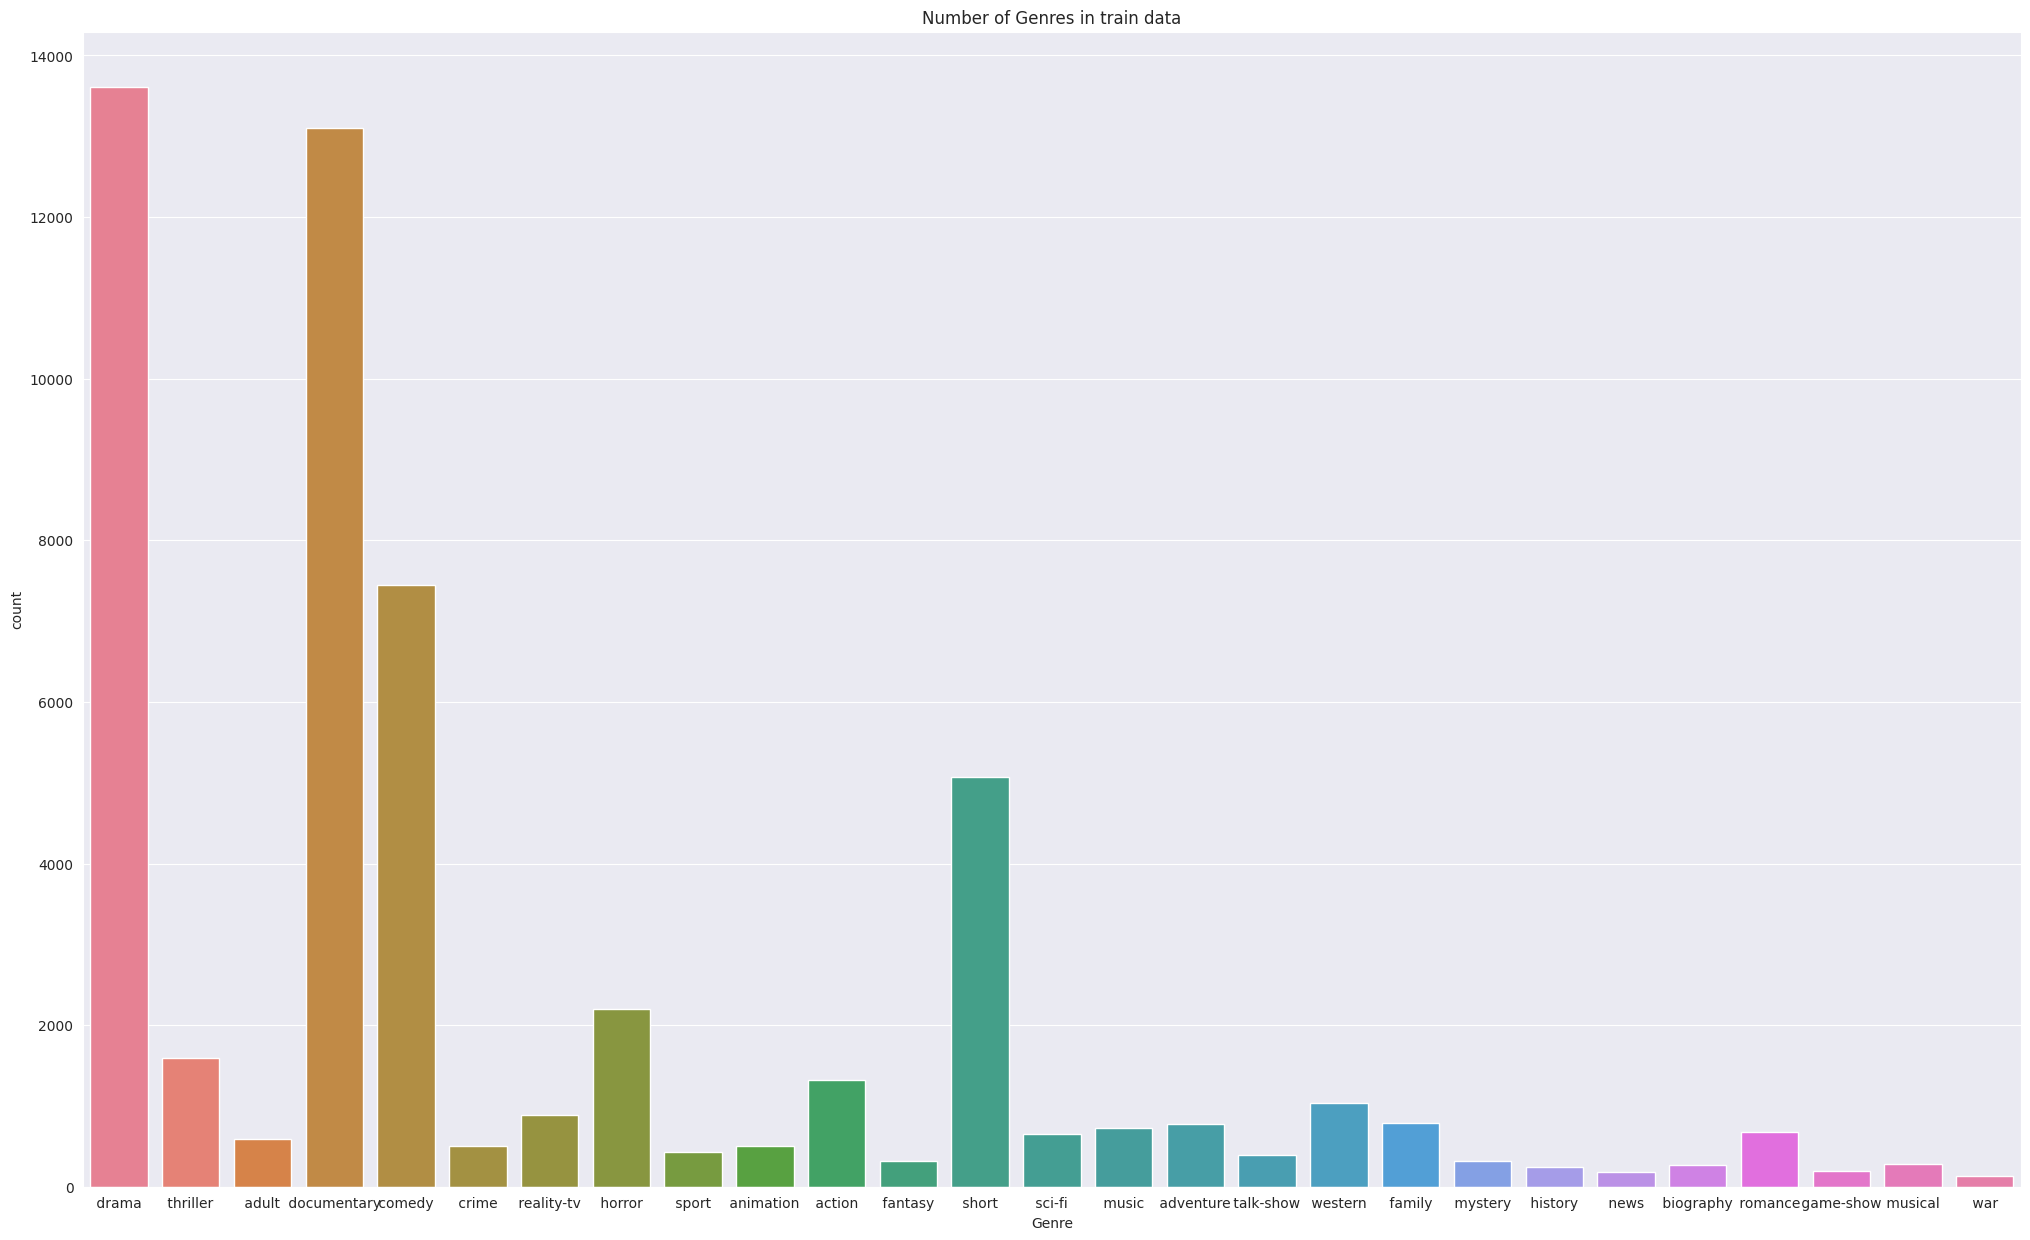

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize= (25,15))
plt.title("Number of Genres in train data")
sns.countplot(data = train_data,x = "Genre",hue = "Genre")

In [ ]:
train_data.isnull().sum()

,0
Title,0
Genre,0
Description,0


In [ ]:
train_data.describe()

,Title,Genre,Description
count,54214,54214,54214
unique,54214,27,54086
top,Oscar et la dame rose (2009),drama,Grammy - music award of the American academy ...
freq,1,13613,12


In [ ]:
genres = train_data["Genre"].unique()
genres.sort()
genres

array([' action ', ' adult ', ' adventure ', ' animation ', ' biography ',
       ' comedy ', ' crime ', ' documentary ', ' drama ', ' family ',
       ' fantasy ', ' game-show ', ' history ', ' horror ', ' music ',
       ' musical ', ' mystery ', ' news ', ' reality-tv ', ' romance ',
       ' sci-fi ', ' short ', ' sport ', ' talk-show ', ' thriller ',
       ' war ', ' western '], dtype=object)

In [ ]:
label_encoder = LabelEncoder()
train_data["Genre"] = label_encoder.fit_transform(train_data["Genre"])
train_data.head(4)

,Title,Genre,Description
1,Oscar et la dame rose (2009),8,Listening in to a conversation between his do...
2,Cupid (1997),24,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",1,As the bus empties the students for their fie...
4,The Secret Sin (1915),8,To help their unemployed father make ends mee...


In [ ]:
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
label_mapping

{' action ': 0,
 ' adult ': 1,
 ' adventure ': 2,
 ' animation ': 3,
 ' biography ': 4,
 ' comedy ': 5,
 ' crime ': 6,
 ' documentary ': 7,
 ' drama ': 8,
 ' family ': 9,
 ' fantasy ': 10,
 ' game-show ': 11,
 ' history ': 12,
 ' horror ': 13,
 ' music ': 14,
 ' musical ': 15,
 ' mystery ': 16,
 ' news ': 17,
 ' reality-tv ': 18,
 ' romance ': 19,
 ' sci-fi ': 20,
 ' short ': 21,
 ' sport ': 22,
 ' talk-show ': 23,
 ' thriller ': 24,
 ' war ': 25,
 ' western ': 26}

In [ ]:
def stemming(text):
  list = []
  ps = PorterStemmer()

  stop_words = set(stopwords.words("english"))
  text = text.lower()
  text = text.translate(str.maketrans('', '', string.punctuation))
  text = ''.join([i for i in text if not i.isdigit()])

  for word in text.split():
    if word not in stop_words:
      list.append(ps.stem(word))

  return " ".join(list)

In [ ]:
train_data["Description"] = train_data["Description"].apply(stemming)
train_data.head(3)

,Title,Genre,Description
1,Oscar et la dame rose (2009),8,listen convers doctor parent yearold oscar lea...
2,Cupid (1997),24,brother sister past incestu relationship curre...
3,"Young, Wild and Wonderful (1980)",1,bu empti student field trip museum natur histo...


In [ ]:
train_data["Title"] = train_data["Title"].apply(stemming)
train_data.head(3)

,Title,Genre,Description
1,oscar et la dame rose,8,listen convers doctor parent yearold oscar lea...
2,cupid,24,brother sister past incestu relationship curre...
3,young wild wonder,1,bu empti student field trip museum natur histo...


In [ ]:
train_data['Combined_Text'] = train_data['Title'] + ' ' + train_data['Description']

X = train_data[['Combined_Text']]
Y = train_data[['Genre']]

In [ ]:
Y

,Genre
1,8
2,24
3,1
4,8
5,8
...,...
54210,5
54211,13
54212,7
54213,5


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [ ]:
x_train

,Combined_Text
19254,shade sex betray seduct manipul addict love ha...
12262,scarecrow autist teen toni friendship cameron ...
37144,larri wilmor race religion sex florida onehour...
21966,dear mr gore person narr documentari use bicyc...
7034,reinikainen easygo villag policeman artturi sa...
...,...
11285,david cronenberg present wireless internet dav...
44733,reis nach tulum adan neumann member jewish fam...
38159,el secreto de magdalena miranda lesbian photog...
861,vfocu enemi profession live chiang chihheng me...


In [ ]:
vectorize = TfidfVectorizer(max_features = 5000)

x_train = vectorize.fit_transform(x_train["Combined_Text"])
x_test = vectorize.transform(x_test["Combined_Text"])

In [ ]:
print(f"X_train shape: {x_train.shape}")
print(f"X_test shape: {x_test.shape}")

X_train shape: (43371, 5000)
X_test shape: (10843, 5000)


In [ ]:
svd = TruncatedSVD(n_components=100)
x_train_svd = svd.fit_transform(x_train)
x_test_svd = svd.transform(x_test)

**SVM**

In [ ]:
x_train_svd.shape,x_test_svd.shape

((43371, 100), (10843, 100))

In [ ]:
dtc = DecisionTreeClassifier(max_depth = 10)
dtc.fit(x_train_svd,y_train)

DecisionTreeClassifier(max_depth=10)

In [ ]:
dtc.score(x_test_svd,y_test), dtc.score(x_train_svd,y_train)

(0.4372406160656645, 0.5304696686726154)

In [ ]:
y_train_array = y_train.values.ravel()
y_train_array

array([8, 8, 7, ..., 8, 8, 7])

In [ ]:
svc = SVC(kernel  ="rbf")
svc.fit(x_train_svd,y_train_array)

SVC()

In [ ]:
svc.score(x_train_svd,y_train_array)